In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import numpy as np

df = pd.concat(pd.read_excel("Dados/201903.xlsx", sheet_name=None), ignore_index=True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Valor        Numero Abast.": "Valor Abast."})
df = df.drop(["Unnamed: 4", "Unnamed: 8"], axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].str.replace(" ", "")
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,2019-03-01,79446,ATL-9841,Abast,ETANOL,44.820,134.01
1,2019-03-01,78038,AJA2563,Abast,DIESEL,85.971,291.45
2,2019-03-01,79445,ATL-9829,Abast,GASOLINA,48.841,199.77
3,2019-03-01,79456,BCC-4704,Abast,GASOLINA,49.240,201.40
4,2019-03-01,79433,ARV-7211,Abast,ETANOL,37.759,112.90
...,...,...,...,...,...,...,...
218,2019-03-29,79802,AJJ-0139,Abast,GASOLINA,42.410,181.95
219,2019-03-29,87011,EQU-8711,Abast,DIESEL,25.020,87.33
220,2019-03-29,79464,BCD-6525,Abast,ETANOL,42.134,125.98
221,2019-03-29,79469,BCD-6603,Abast,ETANOL,45.700,136.64


In [3]:
df.columns

Index(['Data', 'Nr Frota', 'Placa', 'Tipo   Lançamento  Nr. Ordem\nAbast.',
       'Unnamed: 4', 'Unnamed: 8', 'Produto', 'Unnamed: 10',
       'Valor        Numero Abast.'],
      dtype='object')

In [13]:
df.sort_values(by="Nr Litros")

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
216,2019-03-29,79438,ASZ-7061,Abast,GASOLINA,4.840,20.77
131,2019-03-20,87010,EQU-8710,Consum,GASOLINA,5.000,21.46
34,2019-03-08,87004,EQU-8704,Consum,GASOLINA,6.351,26.62
8,2019-03-01,79438,ASZ-7061,Abast,GASOLINA,6.440,26.35
40,2019-03-08,93018,ATW-9367,Abast,GASOLINA,7.141,29.93
...,...,...,...,...,...,...,...
164,2019-03-25,78012,AKF-2842,Abast,DIESEL,122.780,428.51
132,2019-03-20,78012,AKF-2842,Abast,DIESEL,124.281,433.75
153,2019-03-22,78012,AKF-2842,Abast,DIESEL,127.481,444.92
15,2019-03-06,78012,AKF-2842,Abast,DIESEL,131.819,460.06


In [14]:
df[df["Nr Litros"] > df["Nr Litros"].mean()].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
87,2019-03-15,78012,AKF-2842,Abast,DIESEL,141.691,494.51
15,2019-03-06,78012,AKF-2842,Abast,DIESEL,131.819,460.06
153,2019-03-22,78012,AKF-2842,Abast,DIESEL,127.481,444.92
132,2019-03-20,78012,AKF-2842,Abast,DIESEL,124.281,433.75
164,2019-03-25,78012,AKF-2842,Abast,DIESEL,122.780,428.51
...,...,...,...,...,...,...,...
166,2019-03-25,79450,BAB-6291,Abast,DIESEL,48.660,169.83
65,2019-03-12,79454,BCC-4702,Abast,ETANOL,48.579,150.11
66,2019-03-12,79471,BCD-6854,Abast,ETANOL,48.550,150.02
187,2019-03-27,79447,ATL-9887,Abast,ETANOL,48.542,145.14


In [15]:
df[(df["Nr Litros"] > df["Nr Litros"].mean()) & (df["Produto"] == "GASOLINA")].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
115,2019-03-18,79422,AJN-3794,Abast,GASOLINA,54.900,230.04
188,2019-03-27,92046,ALE-6725,Abast,GASOLINA,53.471,229.40
183,2019-03-26,79444,ATL-9834,Abast,GASOLINA,52.030,223.22
28,2019-03-07,92046,ALE-6725,Abast,GASOLINA,51.790,217.01
217,2019-03-29,79445,ATL-9829,Abast,GASOLINA,51.371,220.39
30,2019-03-07,79422,AJN-3794,Abast,GASOLINA,50.550,211.81
175,2019-03-26,77097,AAW-2629,Abast,GASOLINA,50.471,216.53
103,2019-03-15,79444,ATL-9834,Abast,GASOLINA,50.301,210.77
46,2019-03-08,79470,BCD-6851,Abast,GASOLINA,49.561,207.67
114,2019-03-18,79457,BCC-4713,Abast,GASOLINA,49.370,206.87


In [16]:
df["Produto"].value_counts()

ETANOL      97
GASOLINA    72
DIESEL      54
Name: Produto, dtype: int64

In [17]:
df["Produto"].value_counts(normalize=True)

ETANOL      0.434978
GASOLINA    0.322870
DIESEL      0.242152
Name: Produto, dtype: float64

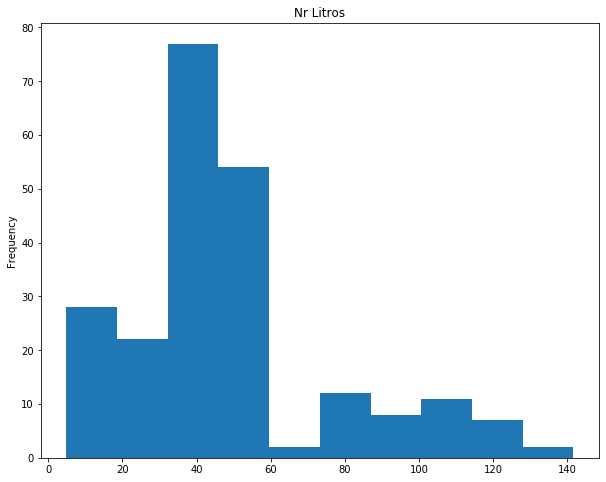

In [18]:
#Ploting
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
df["Nr Litros"].plot(kind='hist', title="Nr Litros")

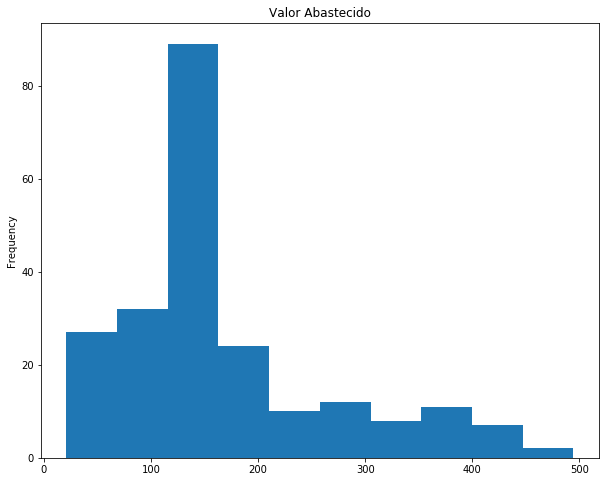

In [19]:
(df["Valor Abast."]).plot(kind='hist', title = "Valor Abastecido")

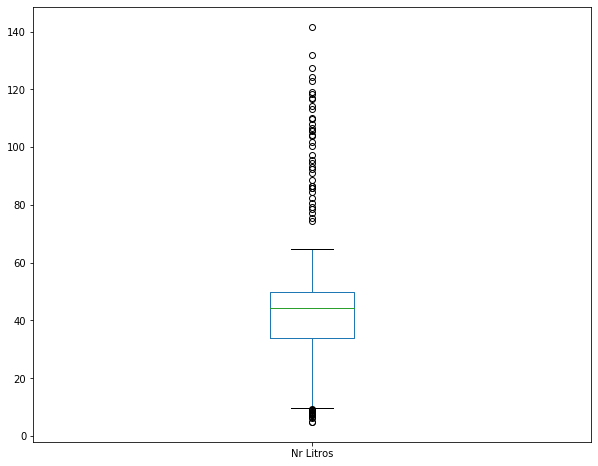

In [20]:
df["Nr Litros"].plot(kind="box")

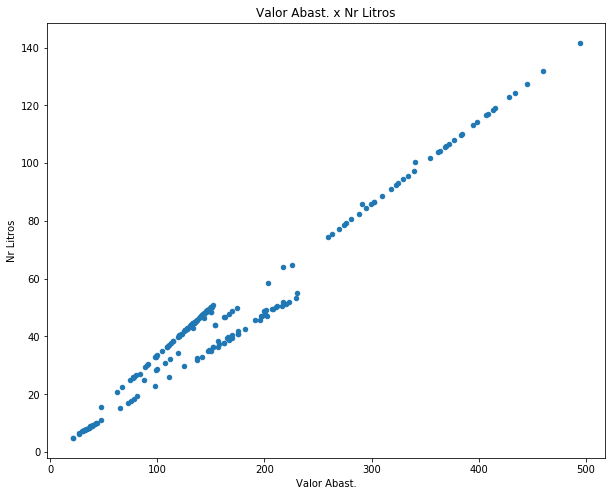

In [21]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

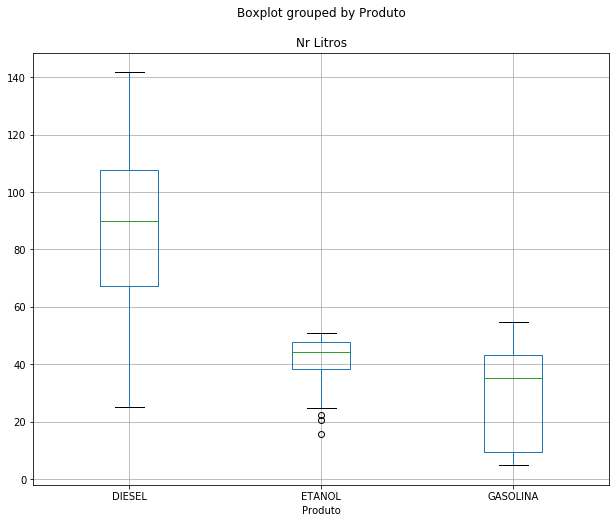

In [22]:
df.boxplot(column="Nr Litros", by="Produto")

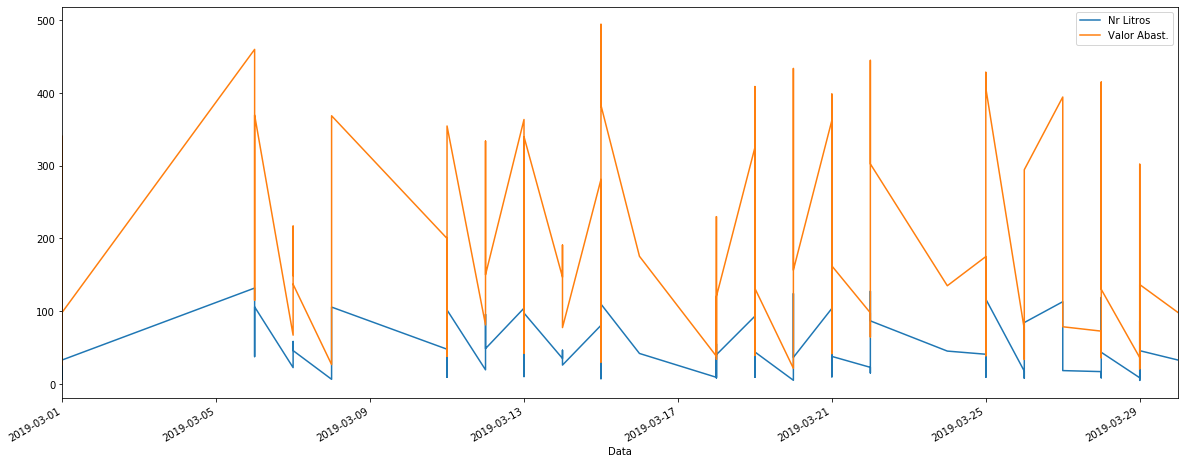

In [23]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

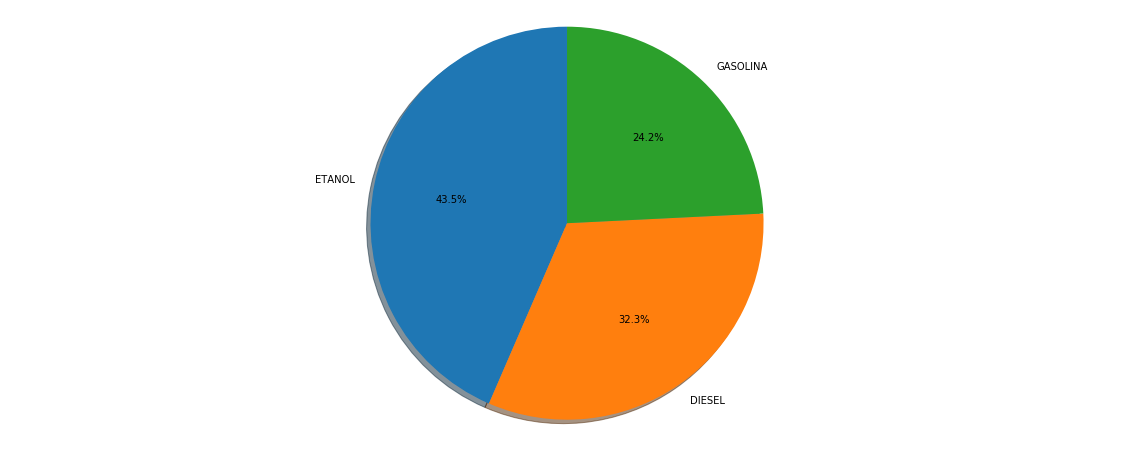

In [24]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

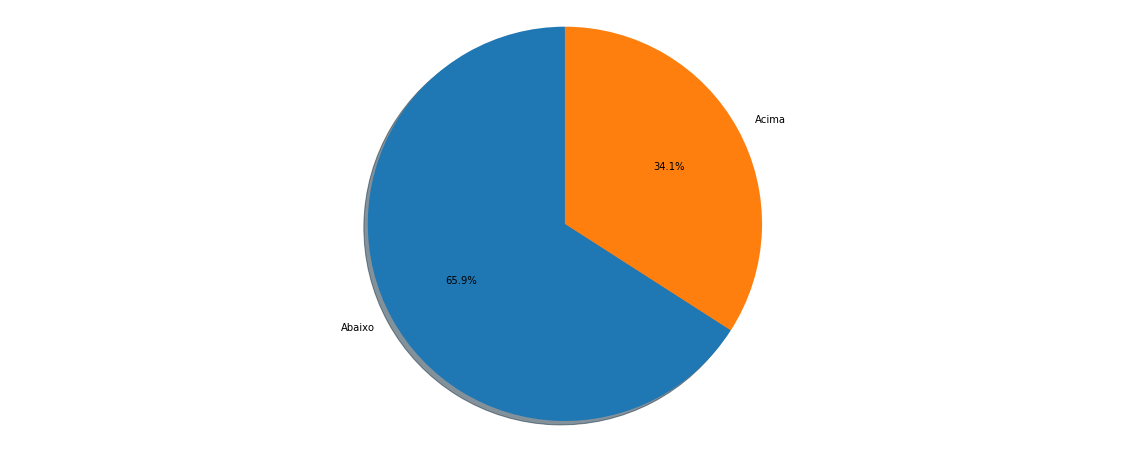

In [25]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

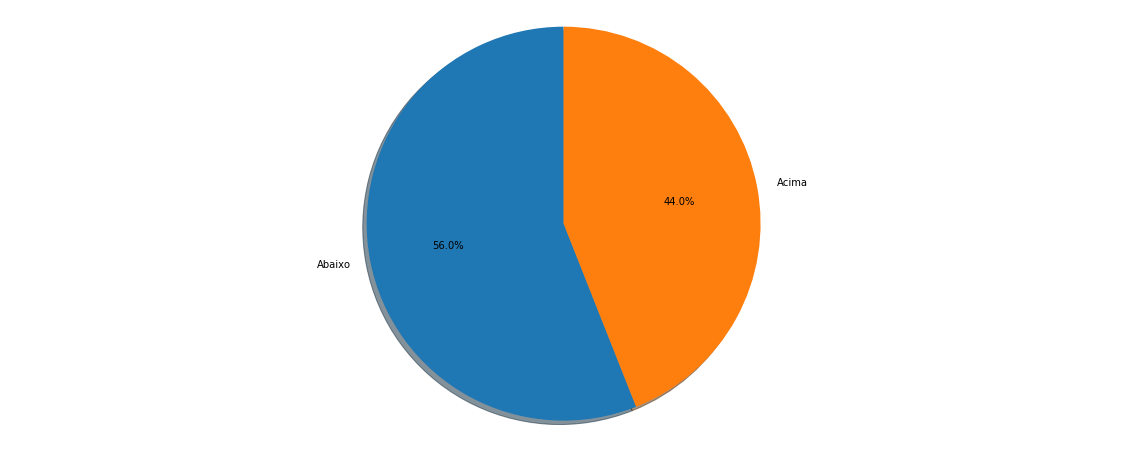

In [26]:
labels = ["Abaixo", "Acima"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

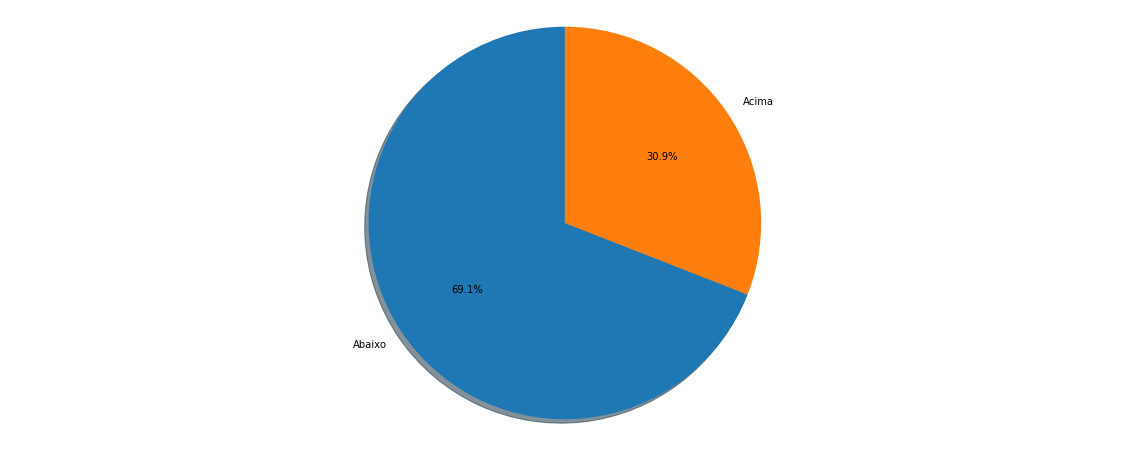

In [27]:
labels = ["Abaixo", "Acima"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

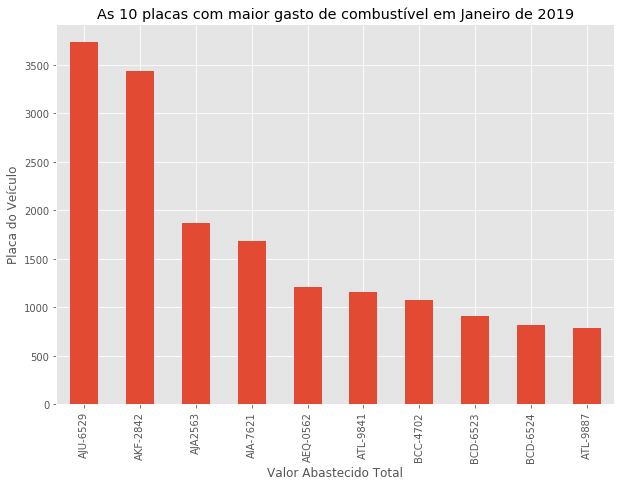

In [31]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 7))

#format the currency
#def currency(x, pos):
#    'The two args are the value and tick position'
#    if x >= 1000000:
#        return '${:1.1f}M'.format(x*1e-6)
#    return 'R${:1.1f}K'.format(x*1e-3)

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Placa", ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='As 10 placas com maior gasto de combustível em Janeiro de 2019', xlabel='Valor Abastecido Total', ylabel='Placa do Veículo')
#formatter = FuncFormatter(currency)
#ax.xaxis.set_major_formatter(formatter)
#add a line for the average
ax.axvline(x = avg, color='b', label='Média', linestyle='--', linewidth=1)

#annotate the values over the average
#for placa in [0, 1, 2]:
#    ax.text(100, placa, "Acima da média")
    
#hide the legend
ax.legend().set_visible(False)

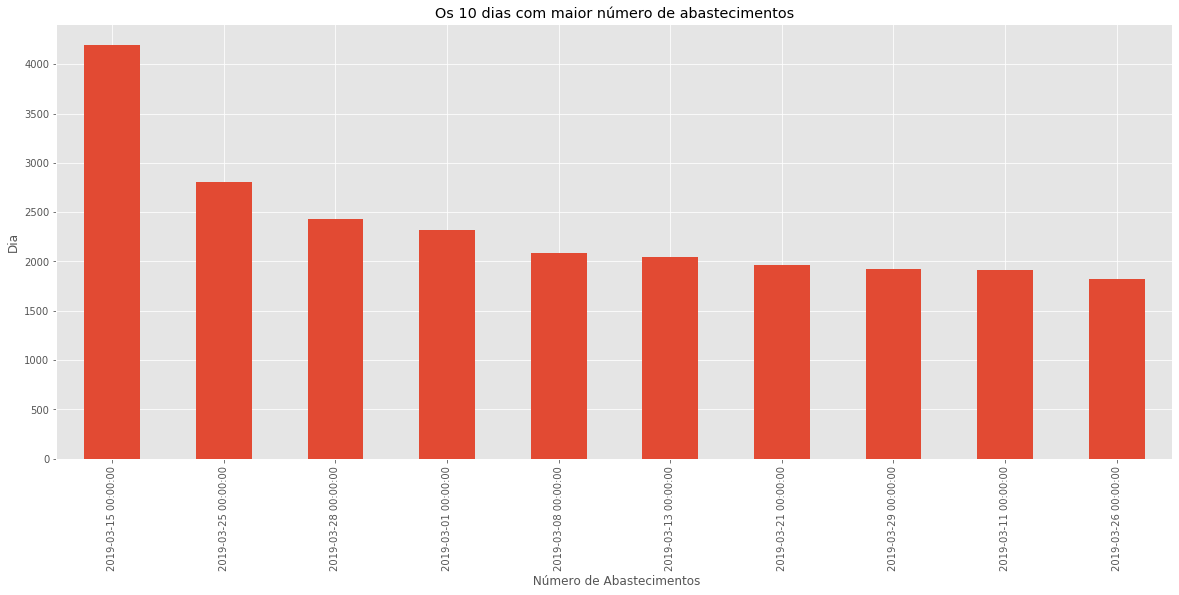

In [29]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Os 10 dias com maior número de abastecimentos', xlabel=' Número de Abastecimentos', ylabel='Dia')

#hide the legend
ax.legend().set_visible(False)

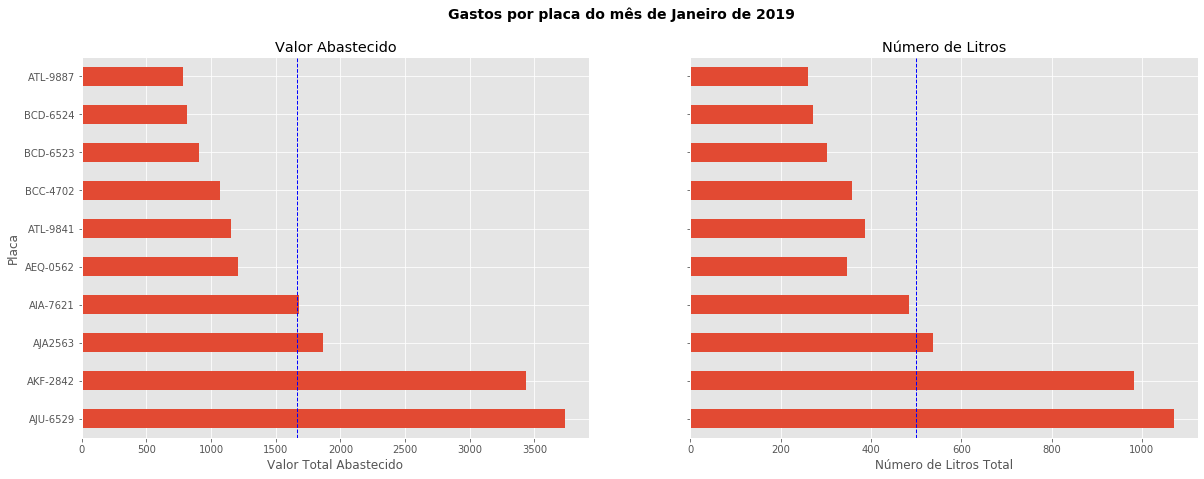

In [32]:
#get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

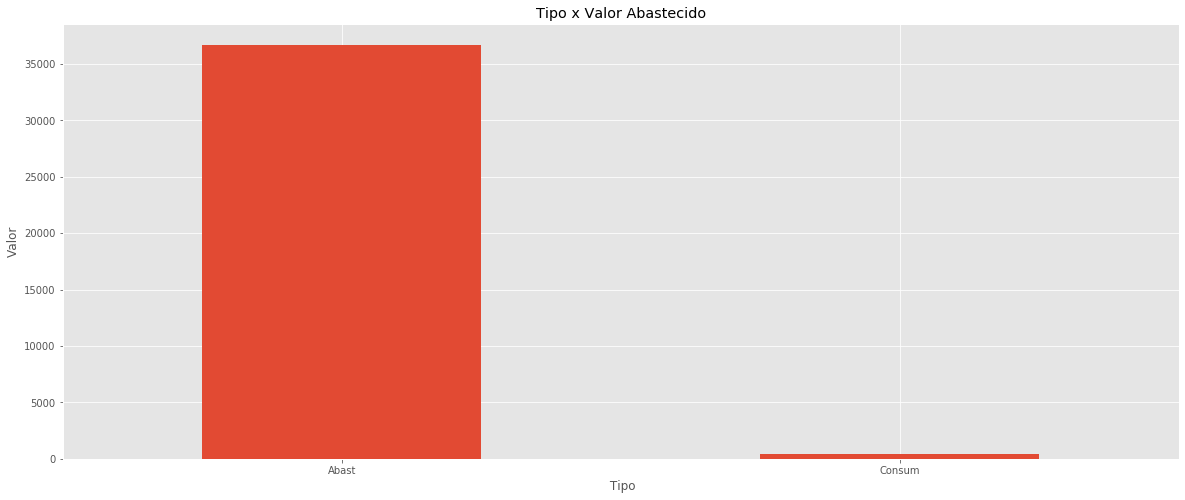

In [33]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Tipo')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Tipo': 'Tipo', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Tipo", rot = 0, ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Tipo x Valor Abastecido', xlabel=' Tipo', ylabel='Valor')

#hide the legend
ax.legend().set_visible(False)

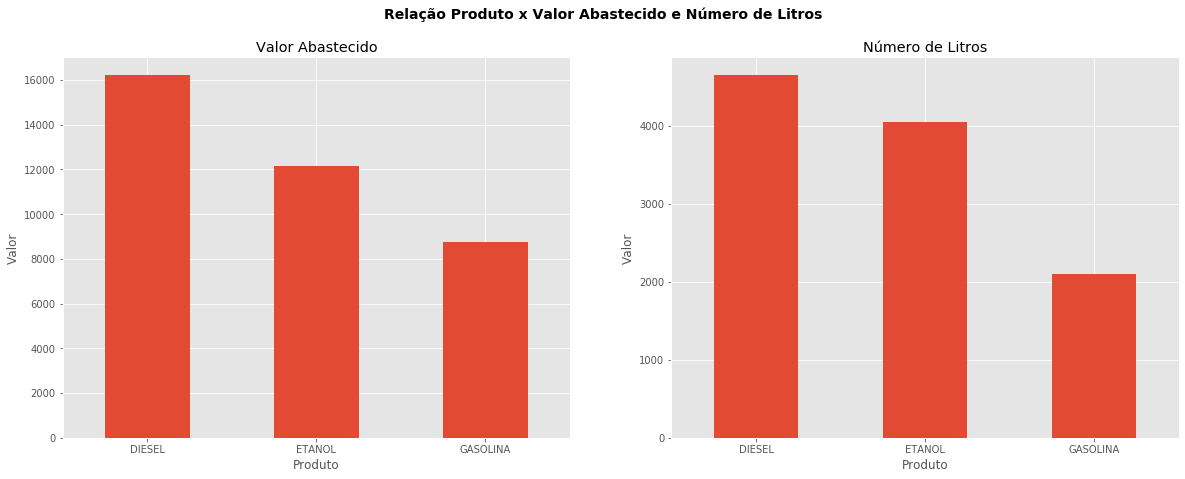

In [34]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

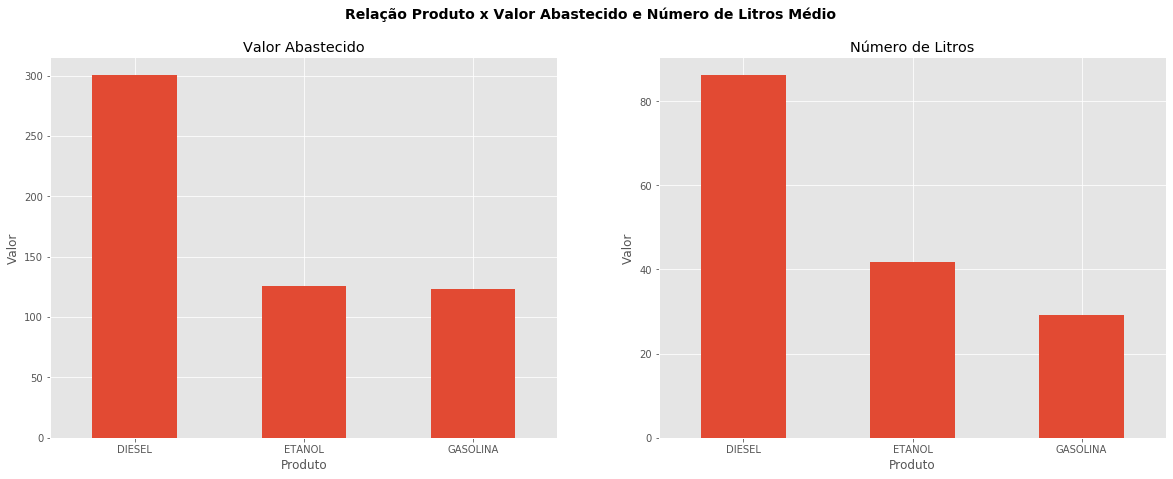

In [35]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'mean', 'Nr Litros': 'mean'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros Médio', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

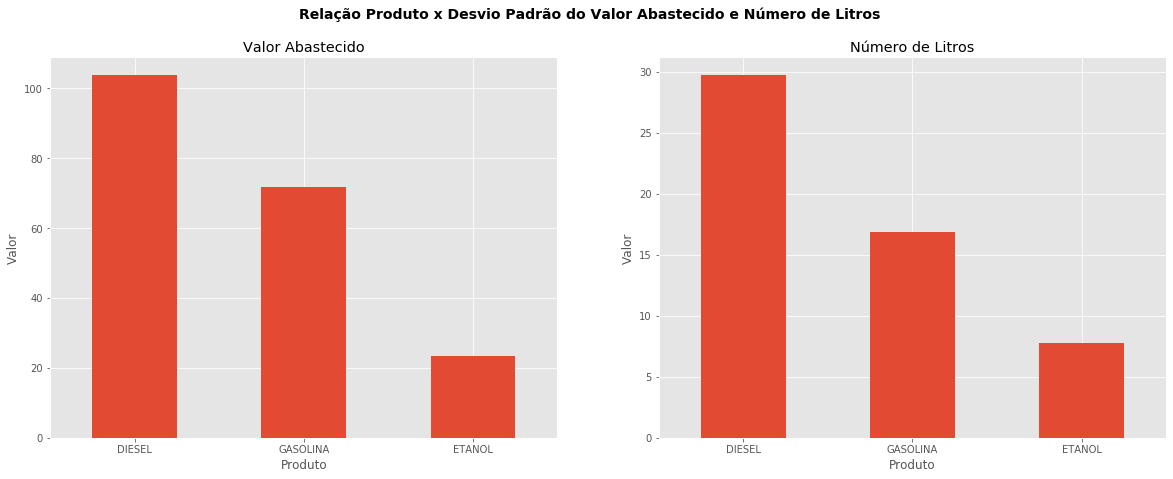

In [36]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'std', 'Nr Litros': 'std'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Desvio Padrão do Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)